In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv


In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv')

# Display the first few rows of the dataframe
df.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


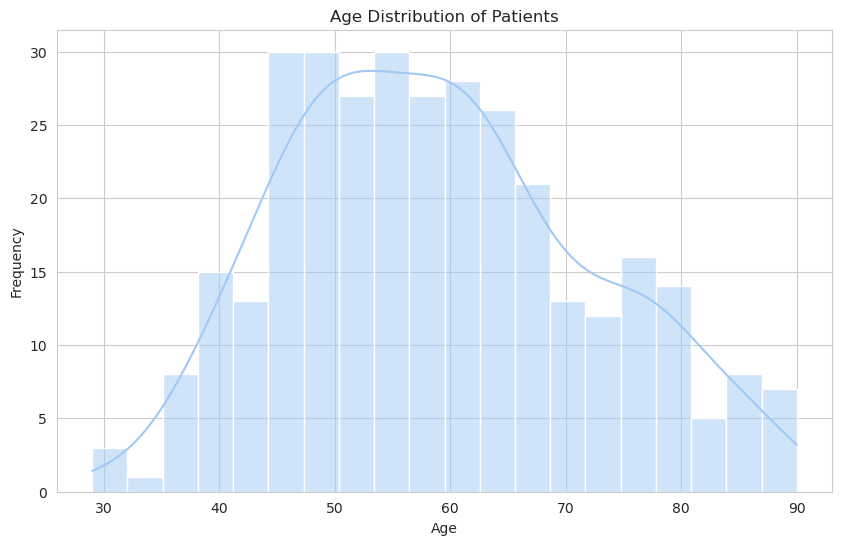

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a histogram for the Age column
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


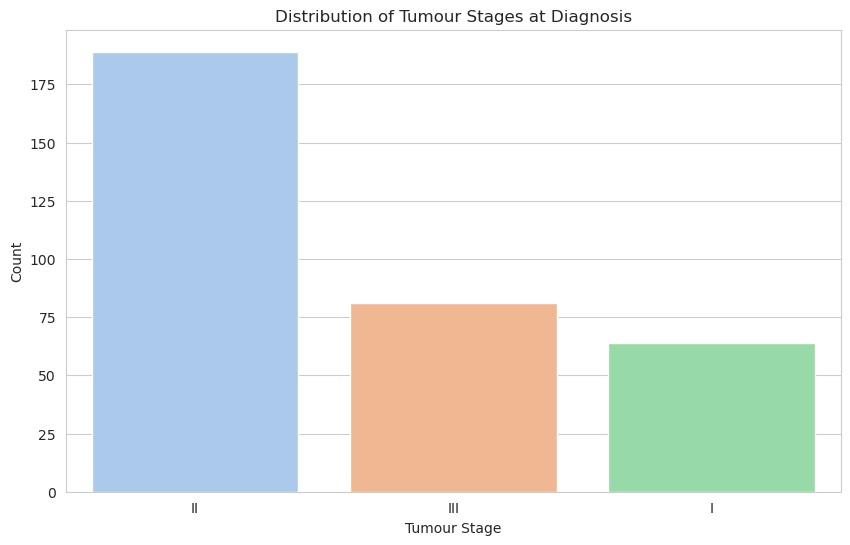

In [4]:
# Create a countplot for the Tumour_Stage column
plt.figure(figsize=(10,6))
sns.countplot(x='Tumour_Stage', data=df, order=df['Tumour_Stage'].value_counts().index)
plt.title('Distribution of Tumour Stages at Diagnosis')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.show()


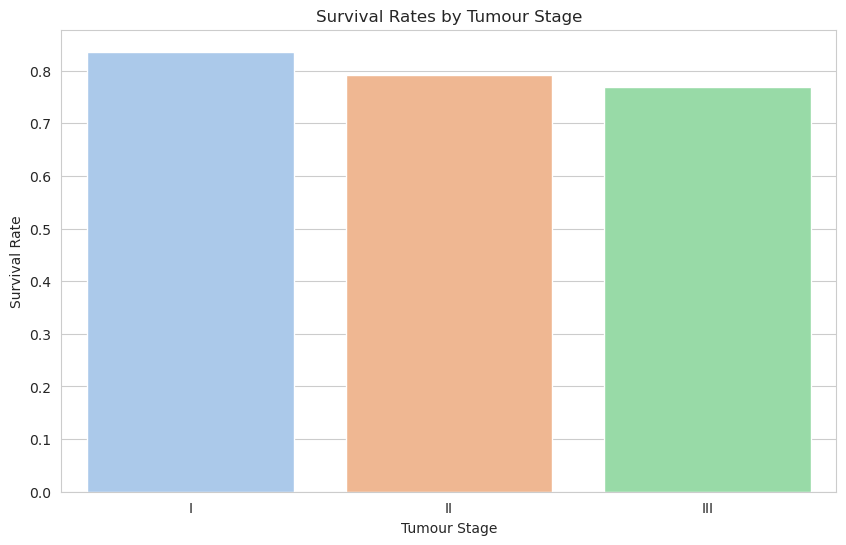

In [5]:
# Create a dataframe with the survival status for each tumour stage
survival_by_stage = df.groupby(['Tumour_Stage', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each stage
survival_by_stage['Survival_Rate'] = survival_by_stage['Alive'] / (survival_by_stage['Alive'] + survival_by_stage['Dead'])

# Create a bar plot for the survival rates by stage
plt.figure(figsize=(10,6))
sns.barplot(x='Tumour_Stage', y='Survival_Rate', data=survival_by_stage)
plt.title('Survival Rates by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Survival Rate')
plt.show()


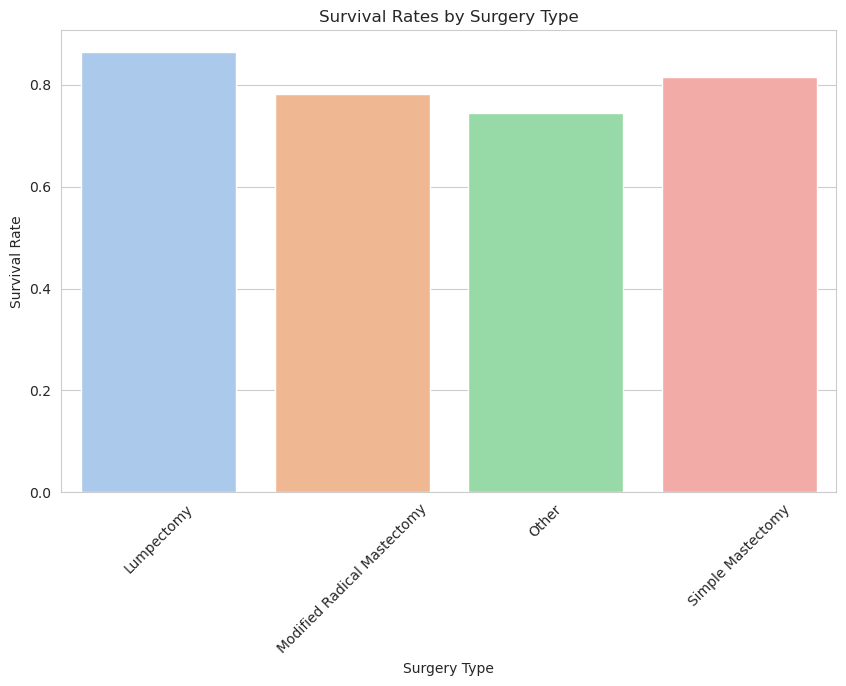

In [6]:
# Create a dataframe with the survival status for each surgery type
survival_by_surgery = df.groupby(['Surgery_type', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each surgery type
survival_by_surgery['Survival_Rate'] = survival_by_surgery['Alive'] / (survival_by_surgery['Alive'] + survival_by_surgery['Dead'])

# Create a bar plot for the survival rates by surgery type
plt.figure(figsize=(10,6))
sns.barplot(x='Surgery_type', y='Survival_Rate', data=survival_by_surgery)
plt.title('Survival Rates by Surgery Type')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


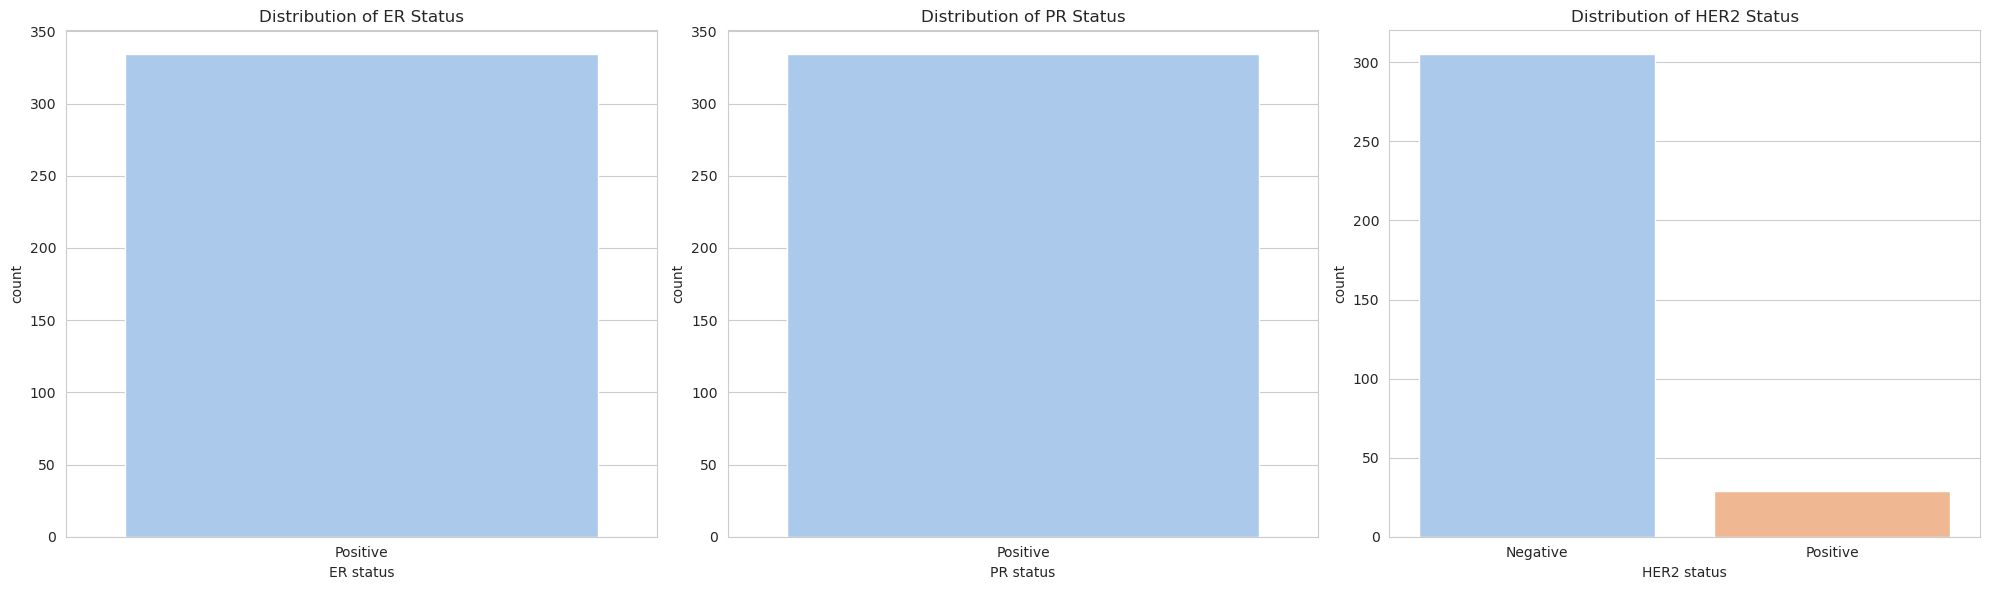

In [7]:
# Create a countplot for the ER status, PR status, and HER2 status columns
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x='ER status', data=df, ax=ax[0])
ax[0].set_title('Distribution of ER Status')

sns.countplot(x='PR status', data=df, ax=ax[1])
ax[1].set_title('Distribution of PR Status')

sns.countplot(x='HER2 status', data=df, ax=ax[2])
ax[2].set_title('Distribution of HER2 Status')

plt.tight_layout()
plt.show()


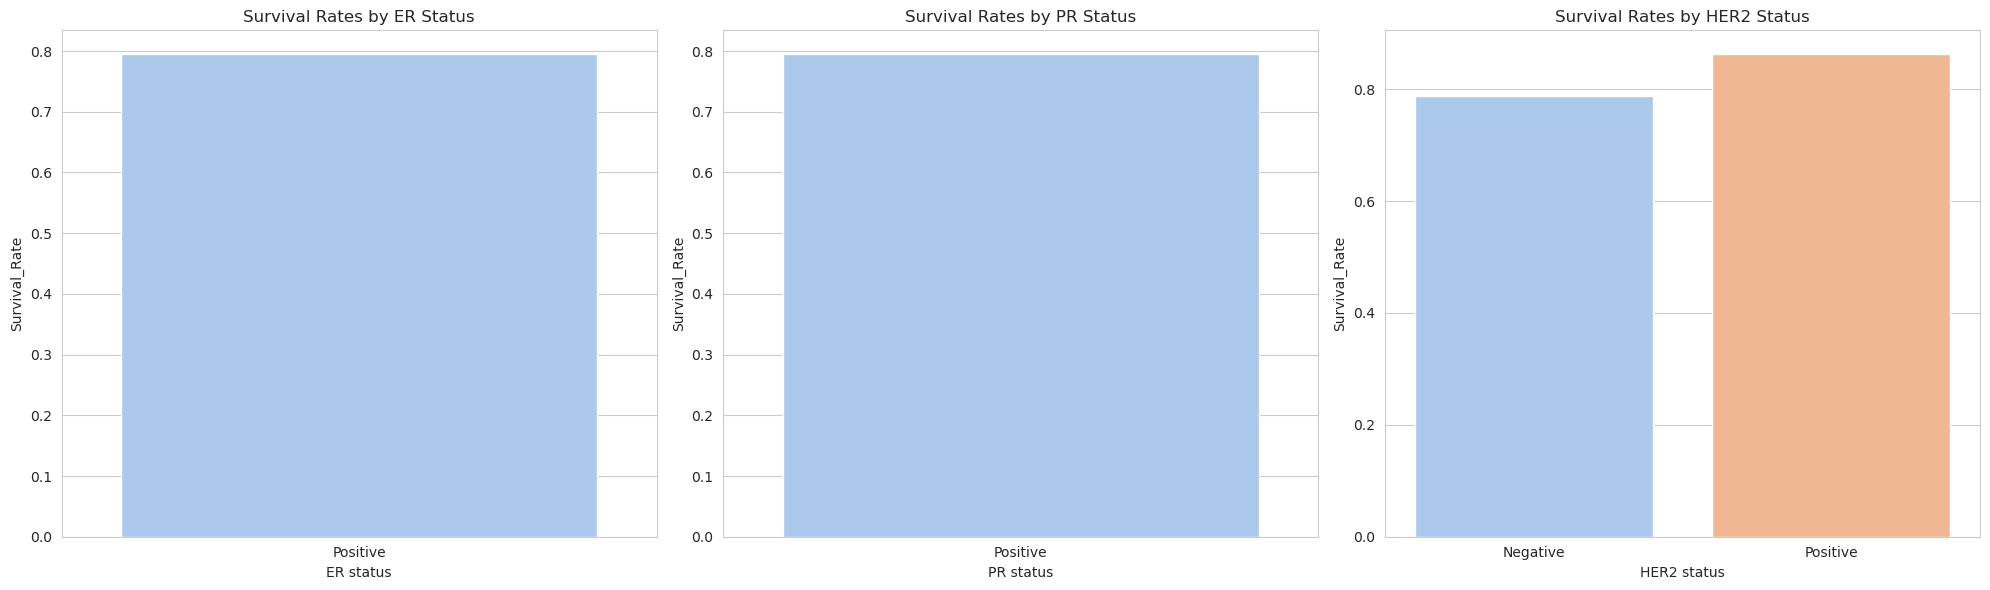

In [8]:
# Create dataframes with the survival status for each hormone receptor status
survival_by_er_status = df.groupby(['ER status', 'Patient_Status']).size().unstack().reset_index()
survival_by_pr_status = df.groupby(['PR status', 'Patient_Status']).size().unstack().reset_index()
survival_by_her2_status = df.groupby(['HER2 status', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each hormone receptor status
survival_by_er_status['Survival_Rate'] = survival_by_er_status['Alive'] / (survival_by_er_status['Alive'] + survival_by_er_status['Dead'])
survival_by_pr_status['Survival_Rate'] = survival_by_pr_status['Alive'] / (survival_by_pr_status['Alive'] + survival_by_pr_status['Dead'])
survival_by_her2_status['Survival_Rate'] = survival_by_her2_status['Alive'] / (survival_by_her2_status['Alive'] + survival_by_her2_status['Dead'])

# Create bar plots for the survival rates by hormone receptor status
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='ER status', y='Survival_Rate', data=survival_by_er_status, ax=ax[0])
ax[0].set_title('Survival Rates by ER Status')

sns.barplot(x='PR status', y='Survival_Rate', data=survival_by_pr_status, ax=ax[1])
ax[1].set_title('Survival Rates by PR Status')

sns.barplot(x='HER2 status', y='Survival_Rate', data=survival_by_her2_status, ax=ax[2])
ax[2].set_title('Survival Rates by HER2 Status')

plt.tight_layout()
plt.show()


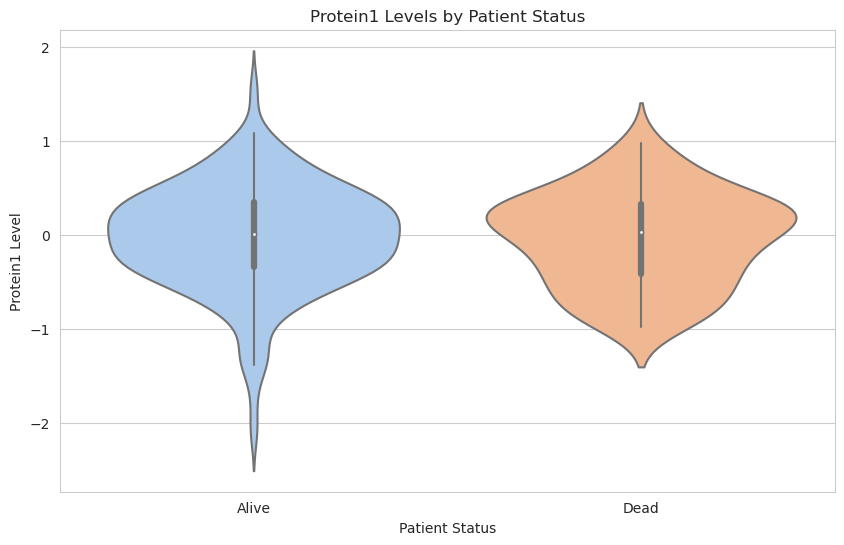

In [9]:
# Create a violin plot for the Protein1 levels by patient status
plt.figure(figsize=(10,6))
sns.violinplot(x='Patient_Status', y='Protein1', data=df)
plt.title('Protein1 Levels by Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Protein1 Level')
plt.show()


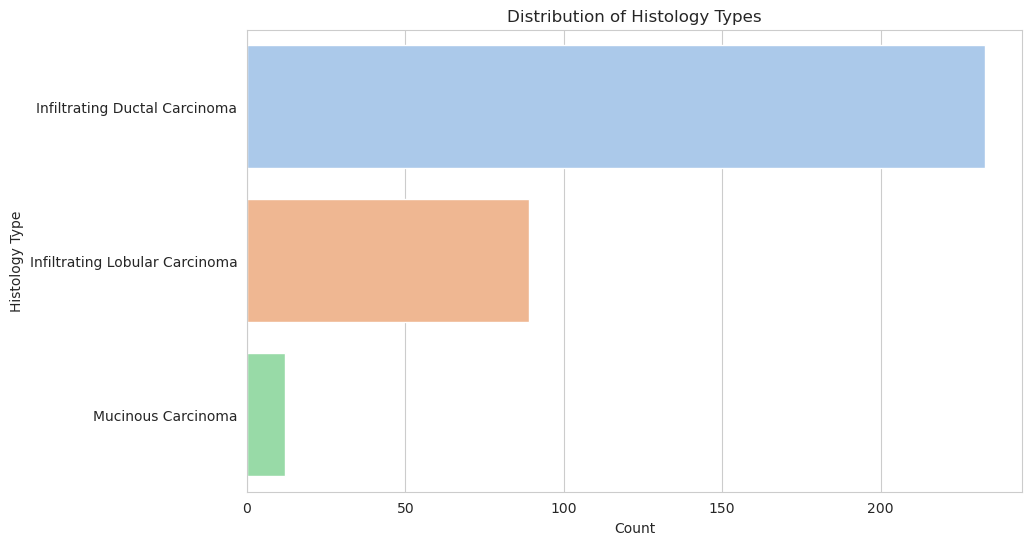

In [10]:
# Create a countplot for the Histology column
plt.figure(figsize=(10,6))
sns.countplot(y='Histology', data=df, order=df['Histology'].value_counts().index)
plt.title('Distribution of Histology Types')
plt.xlabel('Count')
plt.ylabel('Histology Type')
plt.show()


In [11]:
# Convert the date columns to datetime format
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])


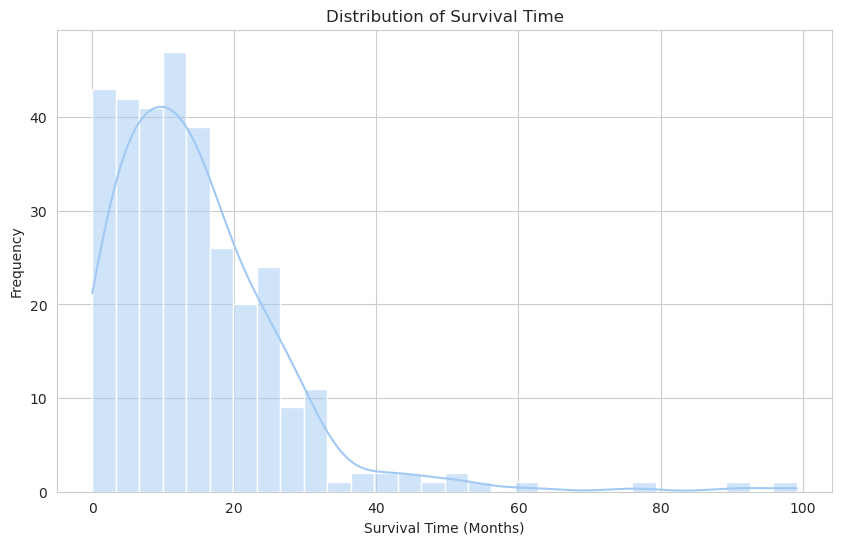

In [12]:
# Calculate the survival time in days
df['Survival_Time_Days'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

# Convert the survival time to months
df['Survival_Time_Months'] = df['Survival_Time_Days'] / 30.44

# Create a histogram for the Survival_Time_Months column
plt.figure(figsize=(10,6))
sns.histplot(df['Survival_Time_Months'], bins=30, kde=True)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Check for missing or infinite values in the 'Survival_Time_Months' and protein columns
missing_or_infinite_values = df[['Protein1', 'Protein2', 'Protein3', 'Protein4', 'Survival_Time_Months']].isnull().sum()
missing_or_infinite_values


Protein1                 0
Protein2                 0
Protein3                 0
Protein4                 0
Survival_Time_Months    17
dtype: int64

In [14]:
# Remove the rows with missing values in the 'Survival_Time_Months' column
df_clean = df.dropna(subset=['Survival_Time_Months'])

# Check the number of rows in the cleaned dataframe
len(df_clean)


317

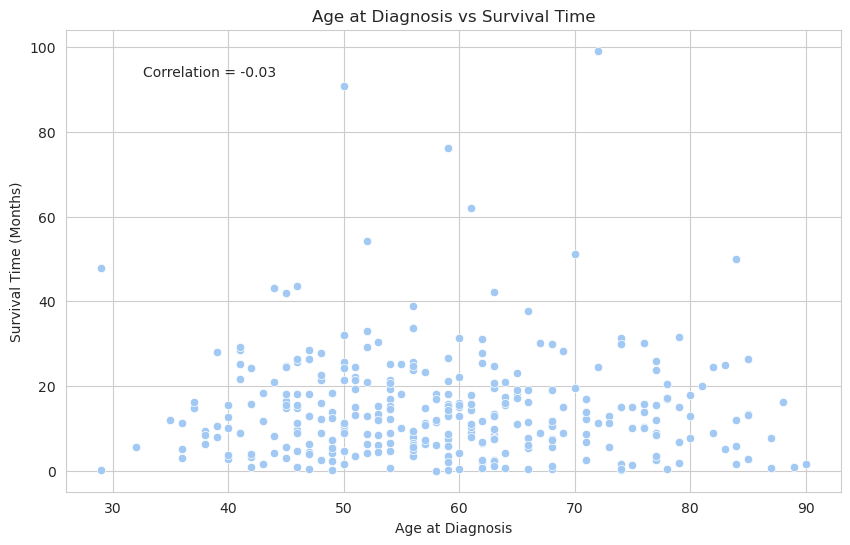

In [15]:
from scipy.stats import pearsonr


# Create a scatter plot for the Age vs Survival Time
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Survival_Time_Months', data=df_clean)
plt.title('Age at Diagnosis vs Survival Time')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Survival Time (Months)')

# Calculate the correlation between Age and Survival Time
corr_age_survival, _ = pearsonr(df_clean['Age'], df_clean['Survival_Time_Months'])
plt.annotate(f'Correlation = {corr_age_survival:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

plt.show()


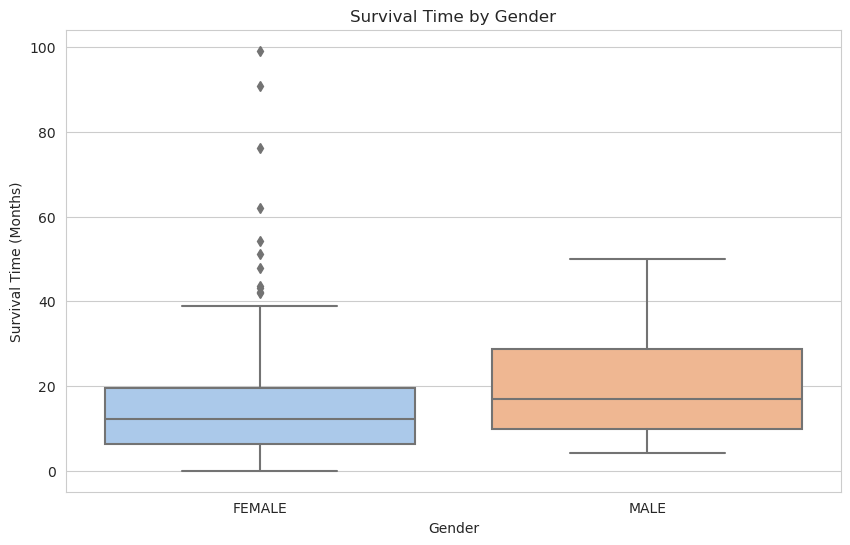

In [16]:
# Create a box plot for the Survival Time by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Survival_Time_Months', data=df_clean)
plt.title('Survival Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Time (Months)')
plt.show()


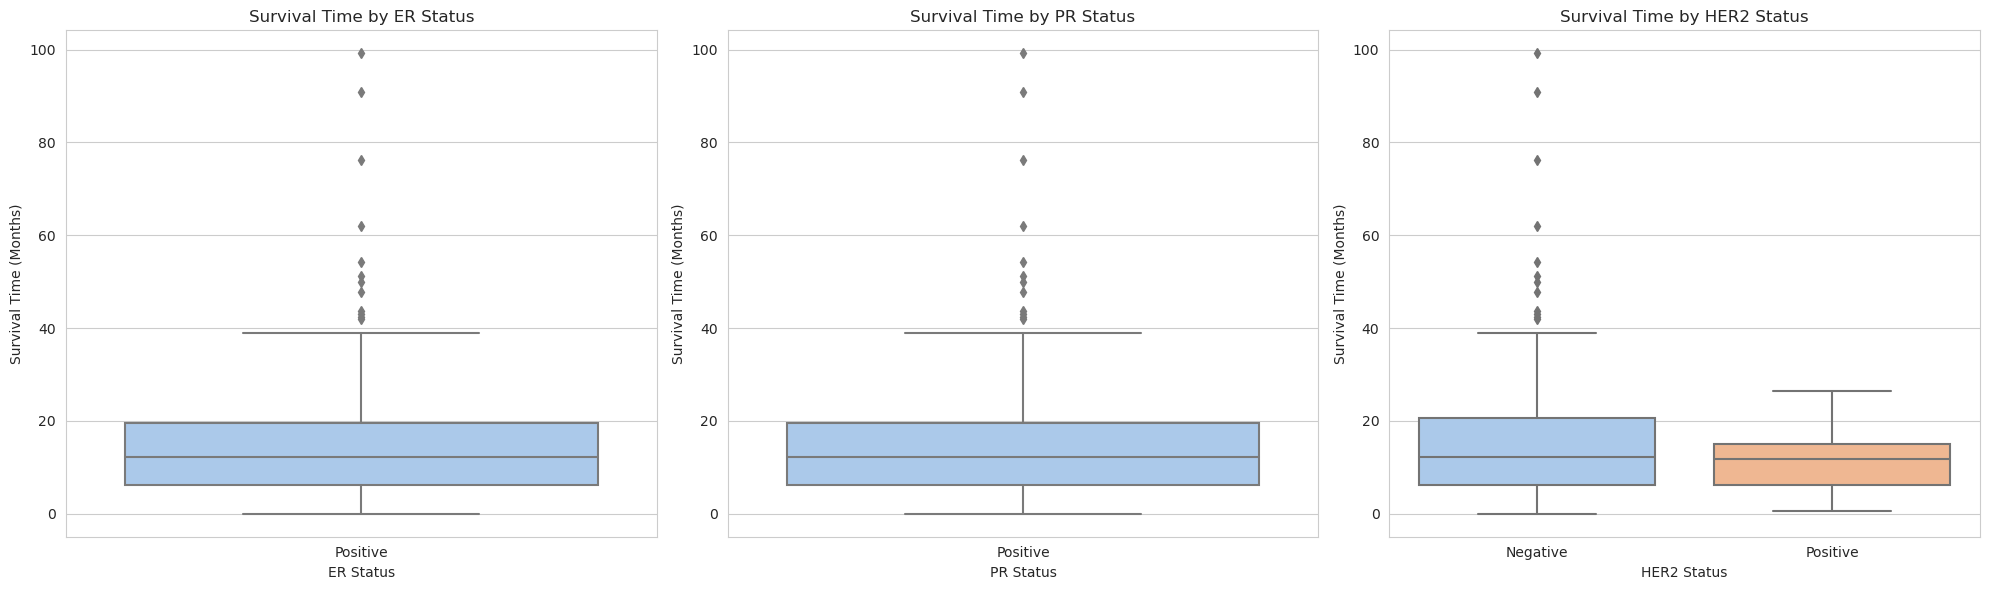

In [17]:
# Create box plots for the Survival Time by hormone receptor status
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='ER status', y='Survival_Time_Months', data=df_clean, ax=ax[0])
ax[0].set_title('Survival Time by ER Status')
ax[0].set_xlabel('ER Status')
ax[0].set_ylabel('Survival Time (Months)')

sns.boxplot(x='PR status', y='Survival_Time_Months', data=df_clean, ax=ax[1])
ax[1].set_title('Survival Time by PR Status')
ax[1].set_xlabel('PR Status')
ax[1].set_ylabel('Survival Time (Months)')

sns.boxplot(x='HER2 status', y='Survival_Time_Months', data=df_clean, ax=ax[2])
ax[2].set_title('Survival Time by HER2 Status')
ax[2].set_xlabel('HER2 Status')
ax[2].set_ylabel('Survival Time (Months)')

plt.tight_layout()
plt.show()
